# Quick start, sudoku example

If you want to run this on your local machine, make sure to install CPMpy first:

```bash
    pip3 install cpmpy     


and for visualisations, also `pandas`, `matplotlib` and `seaborn`:

In [1]:
!pip install cpmpy pandas matplotlib seaborn --quiet

## Loading the libraries

In [2]:
# load the libraries
import numpy as np
from cpmpy import *

## A sudoku puzzle

Sudoku is a logic-based number puzzle, played on a partially filled 9x9 grid. The goal is to find the unique solution by filling in the empty grid cells with numbers from 1 to 9 in such a way that each row, each column and each of the nine 3x3 subgrids contain all the numbers from 1 to 9 once and only once.

We now define an example 9x9 puzzle, with some grid cells given and some empty:

In [3]:
e = 0 # value for empty cells
given = np.array([
    [e, e, e,  2, e, 5,  e, e, e],
    [e, 9, e,  e, e, e,  7, 3, e],
    [e, e, 2,  e, e, 9,  e, 6, e],

    [2, e, e,  e, e, e,  4, e, 9],
    [e, e, e,  e, 7, e,  e, e, e],
    [6, e, 9,  e, e, e,  e, e, 1],

    [e, 8, e,  4, e, e,  1, e, e],
    [e, 6, 3,  e, e, e,  e, 8, e],
    [e, e, e,  6, e, 8,  e, e, e]])

Note how we use `e` to represent the empty cells, where `e` is a standard python variable that we gave value `0`, e.g. the cells with a `0` value are the ones we seek.

## Variables and domains
Let's have a look at the problem description again:

* The goal is to find the unique solution by filling in the empty grid cells with numbers from 1 to 9
    
We will model this with Integer Decision Variables with a value of at least 1 and at most 9, arranged in a matrix just like the given puzzle:

In [4]:
# Variables
puzzle = intvar(1, 9, shape=given.shape, name="puzzle")

## Modeling the constraints

* each row, 
* each column and
* each of the nine 3x3 subgrids contain all the numbers from 1 to 9 once and only once.

We will use the `AllDifferent()` global constraint for this.

In [5]:
# we create a model with the row/column constraints
model = Model(
    # Constraints on rows and columns
    [AllDifferent(row) for row in puzzle],
    [AllDifferent(col) for col in puzzle.T], # numpy's Transpose
)

# we extend it with the block constraints
# Constraints on blocks
for i in range(0,9, 3):
    for j in range(0,9, 3):
        model += AllDifferent(puzzle[i:i+3, j:j+3]) # python's indexing

# Constraints on values (cells that are not empty)
model += (puzzle[given!=e] == given[given!=e]) # numpy's indexing

The last constraint ensures that grid cells that are not empty (e.g. `given != e`) receive their given value.

## Solving

With the data, variables and constraints set, we can now combine these in a CP model, and use a solver to solve it:

In [6]:
# Solve and print
if model.solve():
    print(puzzle.value())
else:
    print("No solution found")

[[3 7 8 2 6 5 9 1 4]
 [5 9 6 8 1 4 7 3 2]
 [1 4 2 7 3 9 5 6 8]
 [2 1 7 3 8 6 4 5 9]
 [8 5 4 9 7 1 6 2 3]
 [6 3 9 5 4 2 8 7 1]
 [7 8 5 4 2 3 1 9 6]
 [4 6 3 1 9 7 2 8 5]
 [9 2 1 6 5 8 3 4 7]]


or display more nicely using some Python libraries

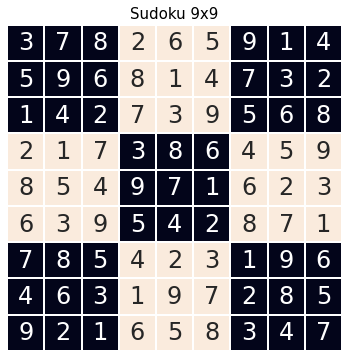

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# matplotlib/seaborn graphical visualisation
def visu_sudoku(grid, figsize=(6,6)):
    N = int(math.sqrt(grid.shape[0]))

    # block-by-block alternation
    bg = np.zeros(grid.shape)
    for i in range(0,9, 3):
        for j in range(0,9, 3):
            if (i+j) % 2:
                bg[i:i+3, j:j+3] = 1
        
    # the figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.set(font_scale=2)
    sns.heatmap(bg, annot=grid,
                cbar=False, linewidths=1, xticklabels=False, yticklabels=False)
    
    plt.title(f"Sudoku {grid.shape[0]}x{grid.shape[1]}", fontsize=15)
    plt.show()


visu_sudoku(puzzle.value())

More examples can be found in the `examples/` folder.

Have fun!